In [80]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Generating Example Data

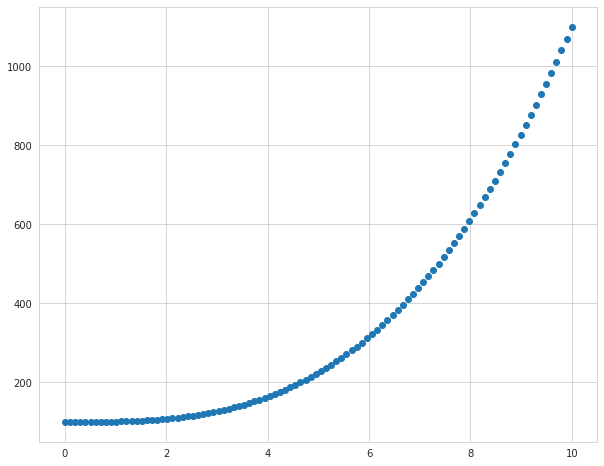

In [81]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0,10,100)


y = X ** 3 + 100 

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.show()

The example data produces a parabolic curve, demonstrating a non-linear relationship between X and Y, however, we also need to add error (or noise) to simulate more realistic data, and for our model to find the error value

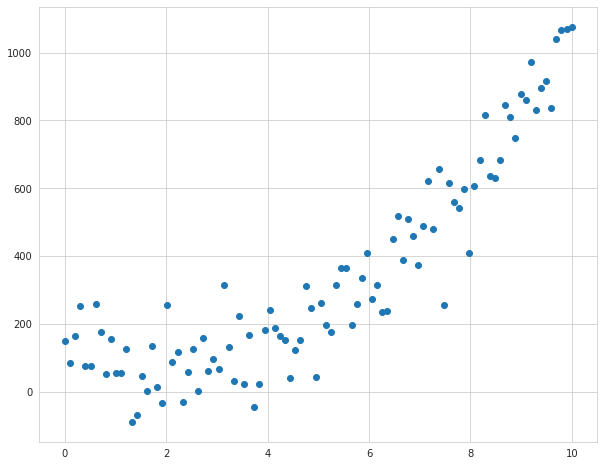

In [82]:
rng = np.random.randn(n_samples) * 100

y = X ** 3 + 100 + rng 

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.show()

# Linear Regression

First, let's run a simple linear regression and look at the $R^2$ value to see how well the model can predict the data

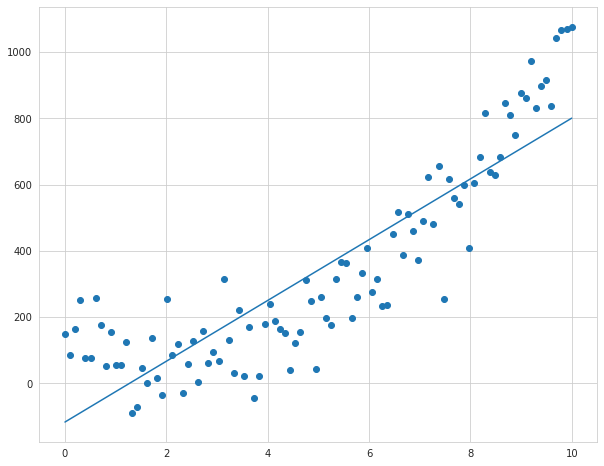

The R² value is 0.7643394574930141


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X.reshape(-1,1),y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X, model_pred)
plt.show()

print("The R\u00b2 value is {}".format(r2_score(y, model_pred)))


So we can see that the linear regression does a somewhat decent job of predicting the data within our presented range. It is only through visually inspecting the regression line against our data that we can see something is amiss, and if we were to try and use the regression model to predict new values outside the presented range we would find it did a poor job of doing so. 

Over time and with practice you will develop an intuition about when to use a polynomial model instead of a simple linear model, however for now the best practice is to run two models and compare the results to find the most suitable for the data. 

# Polynomial Regression

<pre>Linear Regression Example:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Polynomial Regression:</pre>

<img src="simple_linear_regression.png" alt="Drawing" style="width: 400px;"/> <img src="polynomial_regression.png" alt="Drawing" style="width: 400px;"/>

Unlike linear regression, where the input values are linearly associated with the output values, polynomial regression can handle (but does not necessarily require) cases where:

- $X$ never reaches zero
- The relationship between $X$ and $Y$ is not linear

This is often represented in more complex datasets or relationships or may even be an artifact of interactions between input variables. 

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression. 

https://en.wikipedia.org/wiki/Polynomial_regression


The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x. In simple linear regression, the model

    y = β 0 + β 1 x + ε 

is used, where ε is an unobserved random error with mean zero conditioned on a scalar variable x. In this model, for each unit increase in the value of x, the conditional expectation of y increases by β1 units.

In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form

    y = β 0 + β 1 x + β 2 x 2 + ε 

In this model, when the temperature is increased from x to x + 1 units, the expected yield changes by β 1 + β 2 ( 2 x + 1 ) (This can be seen by replacing x in this equation with x+1 and subtracting the equation in x from the equation in x+1.) For infinitesimal changes in x, the effect on y is given by the total derivative with respect to x: β 1 + 2 β 2 x . The fact that the change in yield depends on x is what makes the relationship between x and y nonlinear even though the model is linear in the parameters to be estimated.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

    y = β 0 + β 1 x + β 2 x 2 + β 3 x 3 + ⋯ + β n x n + ε .


In [84]:
from sklearn.preprocessing import PolynomialFeatures

Here we are defining our polynomial features, saying that we want to go up to the 2nd degree, meaning $X^2$, we are then transforming our $X$ values using these features. This means that for each observation in $X$ we generate a constant term, the original $X$ value and the $X^2$ value. 

In [85]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

We can see this transformation by looking at the first five values of $X$ (represented as a vector) and of transformed $X$ (represented as an array)

In [86]:
print("Our original X values: \n", X[:5])
print("\nOur transformed X values: \n", X_poly[:5])

Our original X values: 
 [0.        0.1010101 0.2020202 0.3030303 0.4040404]

Our transformed X values: 
 [[1.         0.         0.        ]
 [1.         0.1010101  0.01020304]
 [1.         0.2020202  0.04081216]
 [1.         0.3030303  0.09182736]
 [1.         0.4040404  0.16324865]]


For our transformed values, the first column of the array is the constant, the second is the original $X$ value and the third is $X^2$. If we were to ask for degree=3, an additional column would be generated of $X^3$.

Using our transformed $X$ values we are then performing a linear regression as normal

In [87]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1,1))
y_pred = lin_reg_2.predict(X_poly)

The R² value is 0.9173858308909386


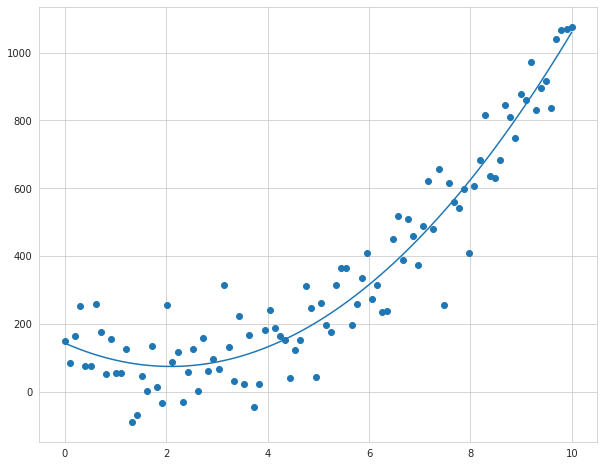

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X, y_pred)
print("The R\u00b2 value is {}".format(r2_score(y, y_pred)))

Utilising a polynomial method we have managed to achieve a much higher $R^2$ score, and can see visually that the regression line fits our data much better. However, what is not obvious here is that the best fitting model would actually be a polynomial with degree=3. The reason we cannot see that here is because the range of our data is too small, it would become more obvious as $X$ continues beyond 10. We may need to fit multiple models with varying degrees to find the most suitable for our data.  

# Boston Housing Dataset

So how would we apply polynomial regression to non-simulated, real world data?

In [89]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    boston = load_boston()
    
df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= np.append(boston['feature_names'], 'target'))

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [90]:
pd.options.display.float_format = "{:,.2f}".format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [91]:
X_boston = df['DIS'].values
y_boston = df['NOX'].values

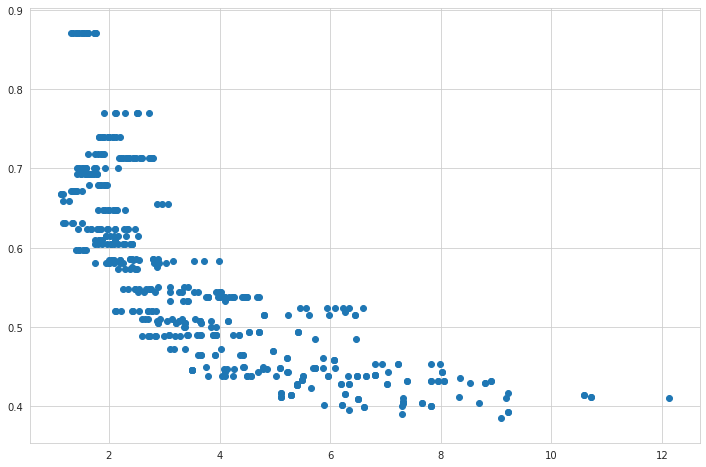

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)
plt.show()

Notice that this is a decreasing function, where as $y$ approaches zero it begins to flatten out.

## Linear

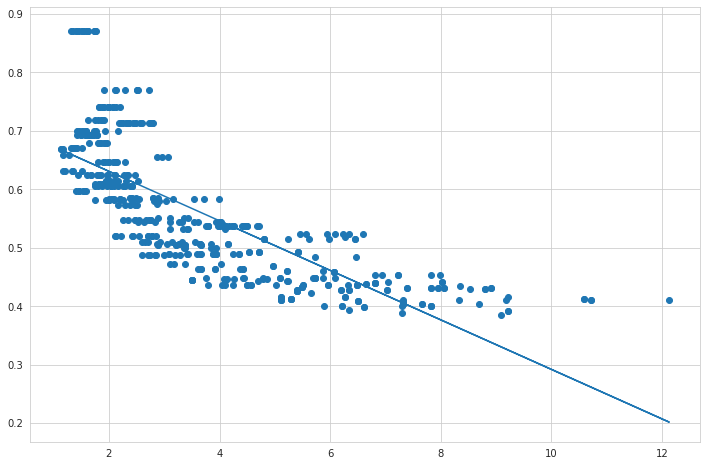

R² score = 0.59


In [93]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1,1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_boston, model_pred)
plt.show()
print("R\u00b2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

It is clear that the linear regression is not a good fit for this data, and will continue to predict smaller $y$ values as $X$ increases, despite the data becoming flat

## Quadratic

In [94]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_2 = LinearRegression()

In [95]:
lin_reg_2.fit(X_poly_b, y_boston)
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [96]:
X_fit #standardised interval between X values for predicting y

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [97]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

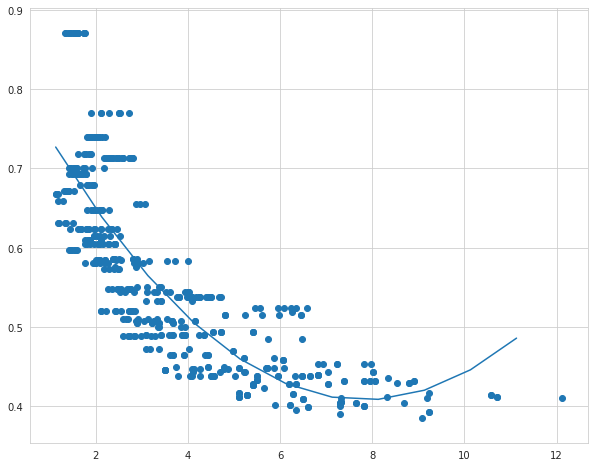

R² score = 0.70


In [98]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
plt.show()

print("R\u00b2 score = {:.2f}".format(r2_score(y_boston, lin_reg_2.predict(X_poly_b))))

The quadratic formula produces a much better fit than our initial linear formula, however the tail end of the fit line begins to rise in a parabolis which diverges from the flat nature of the true data. It may be that we actually need a logarithmic formula instead, though this will depend on the range of data that is likely to be fed to the model. Up to $X$ = 10, this model actually performs relatively well at predicting $y$, and we may wish to bias towards simplicity rather than opting for a more complicated model to suit what may ultimately be a fractional proportion of predictions. 

Nevertheless, lets continue by comparing a cubic formula (polynomial with degree=3).

## Cubic

In [99]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1,1))
lin_reg_3 = LinearRegression()

In [100]:
lin_reg_3.fit(X_poly_b, y_boston)
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [101]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

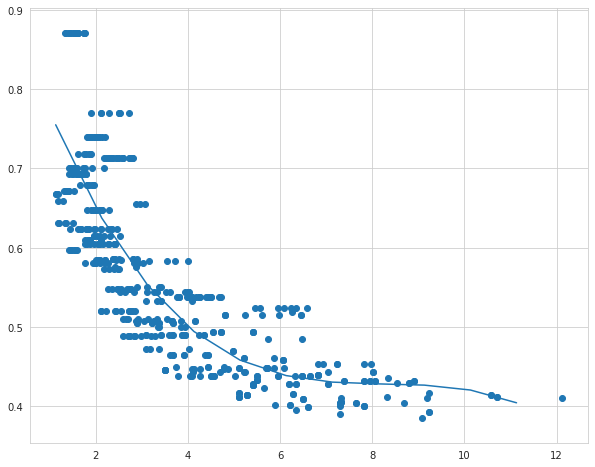

R² score = 0.71


In [102]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
plt.show()

print("R\u00b2 score = {:.2f}".format(r2_score(y_boston, lin_reg_3.predict(X_poly_b))))

Our $R^2$ has improved marginally, but we are seeing the tail end of the fit line dip, which is a problem of using higher polynomials. We are beginning to see the effect of overfitting. The polynomial regression is still a linear model and is more flexible and powerful than a simple linear model, but is limited by higher polynomial effects and overfitting (when a model is good at predicting trained data, but does not generalise to new data). 

# Non-Linear Relationships

Here, we will begin to move away from the simple linear, ordinary least square or polynomial regressions, which are all linear models (while polynomial regression fits non-linear data the underlying assumptions and statistical estimation function is still linear). We may still utilise linear models as baselines in order to compare the results of our non-linear models. 

Non-linear models can be used to describe the relationships between complex variables, where they do not follow a simple linear pattern. We are beginning to touch on more complex machine learning algorithms, though I will present them in terms of the regressions we have utilised so far. 

## Decision Tree

Simple decision trees can be used to perform regression analysis on complex data. Typically, decision trees are seen as a classification based algorithm, though they can also be used for regression based comparisons. Classification is typically categorical (outputs fit into binary (0 or 1) or multiple 'categories' or bins/classes), while regression based approaches produce continuous or scalar outputs (e.g. float values between 0 and 10). 

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    boston_data = load_boston()
    
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [105]:
X = df[['LSTAT']].values

One of the most important factors for a decision tree is how deep (or how 'big') do we want the tree to be? To begin, let's try a depth of 5. We are not currently tuning any of the other available parameters, we are just trying to gain an intuition about the data and how well a basic decision tree performs. 

In [106]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
sort_idx = X.flatten().argsort() # X comes in an array and we want to flatten it then sort it from smallest to largest for plotting

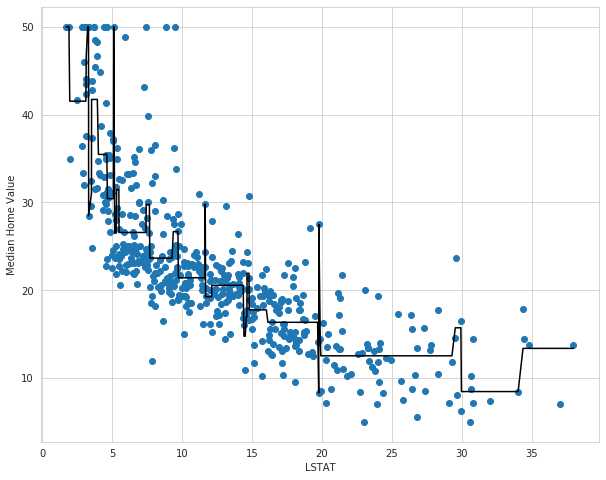

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('Median Home Value')
plt.show()

So here we have a model with predictions that are irregular, they are jumping up and down. This is typically a sign of a model overfitting, so we need to reduce the degrees of freedom by reducing the max depth of the tree. 

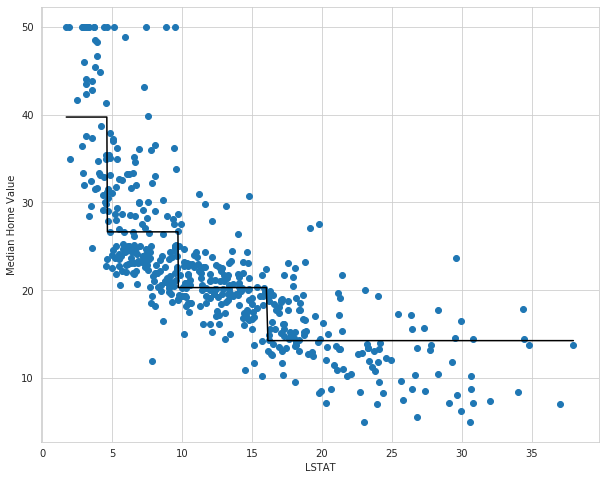

In [109]:
tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X,y)
sort_idx = X.flatten().argsort() 
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('Median Home Value')
plt.show()

This is a much better example of a fitted tree based regression, which is showing 'steps' in the predicted values, though may be too restricted in modelling the data. Therefore we can explore using tree depths between 2 and 5. 

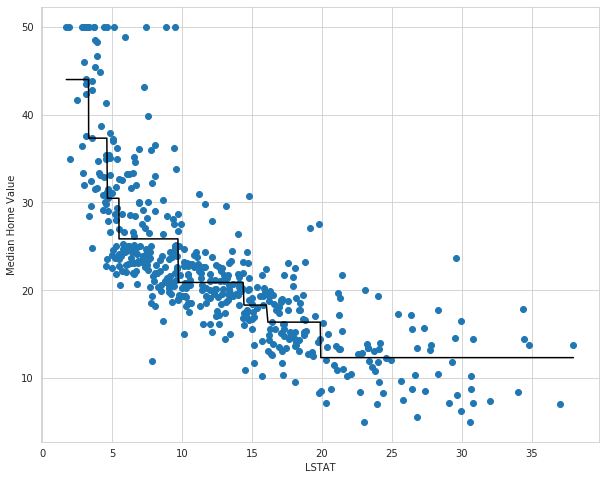

In [110]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X,y)
sort_idx = X.flatten().argsort() 
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('Median Home Value')
plt.show()

Comparing depths of 3 and 4 we can see that 3 is likely the best depth to use in this instance. This process is quite iterative, and cannot be avoided. You simply have to take your time and compare each step. There are some programs that will allow you to automatically iterate through a range of values and select the best performing in order to speed up this step. 

## Random Forest

A random forest is a combination of decision trees, instead of just one tree it utilises many of them to achieve the same goal. The output of the many trees is averaged to find the most suitable outcome. 

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [112]:
from sklearn.ensemble import RandomForestRegressor

For now don't worry too much about the criterion. We are asking the random forest to run 500 trees, using the mean squared error criterion to assess accuracy. We are also fixing the random state to ensure we get the same results and asking the backend parallel processing to use as many threads as are available (n_jobs). Random Forest is computationally expensive, which is why n_jobs is made available as an input criteria, it will be especially important if you are working with a large amount of data. 

In [113]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [114]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [115]:
y_train_pred = forest.predict(X_train)

In [116]:
y_test_pred = forest.predict(X_test)

In [117]:
print("MSE\ntrain: {0:.4f},\ntest: {1:.4f}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE
train: 1.8700,
test: 9.3921


In [118]:
print("R\u00b2\ntrain: {0:.4f},\ntest: {1:.4f}".format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R²
train: 0.9787,
test: 0.8740


From our $R^2$ value we can see that the random forest model has performed better than our previous models, however we can also see from $R^2$ and MSE that the model performs substantially worse on our test data compared to our training data.

## AdaBoost

Finally, we may consider the adaboost method, which is another form of decision tree regressors. 

In [119]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators=500, random_state=42)
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

print("MSE\ntrain: {0:.4f},\ntest: {1:.4f}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

print("R\u00b2\ntrain: {0:.4f},\ntest: {1:.4f}".format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE
train: 4.6605,
test: 13.4949
R²
train: 0.9470,
test: 0.8189


AdaBoost did not manage to outperform the random forest regressor, so in this instance we may default back to the random forest. However, in live environments we may choose to keep both models around in order to compare them and check that our functional model is not deteriorating. We may use AdaBoost as a baseline, or if we are seeing deterioration in both models it may signify that something is changing in our underlying data. 

# Improving Performance

We may wish to improve the performance of our decision tree based models. Initially, this should be done via feature engineering, cleaning and improving upon our input data and features. Above other methods, random forest and adaboost offer us a way of determining the impact of input features on the outcome variable(s) via feature importance. 

## According to AdaBoost

In [120]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [121]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [123]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [124]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.43
RM,0.24
DIS,0.14
PTRATIO,0.04
NOX,0.04
CRIM,0.03
B,0.02
TAX,0.02
RAD,0.02
INDUS,0.01


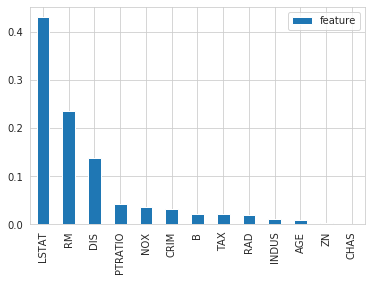

In [125]:
result.sort_values(by='feature', ascending = False).plot(kind='bar')

So it is clear that LSTAT is our most important feature, having the largest impact on the predicted values. In contrast, CHAS and ZN has no impact and can likely be removed from the data.

## According to Random Forest

In [126]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.41
RM,0.40
DIS,0.06
CRIM,0.03
PTRATIO,0.02
NOX,0.02
AGE,0.01
B,0.01
TAX,0.01
INDUS,0.01


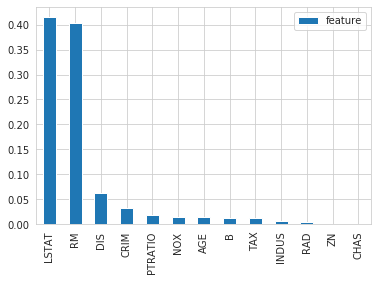

In [127]:
result.sort_values(by='feature', ascending = False).plot(kind='bar')

So our random forest feature importances preserves the order of importance seen in adaboost, though the RM feature appears to have a larger impact on predictions in random forest than for adaboost. 

Overall, we may choose to use only the first three features (LSTAT, RM and DIS) to build a more accurate model with less noise. We can then compare the performance of this model against our current models as baselines. Importantly, we must be wary of overfitting. 

Using our new found knowledge of feature importance we may also choose to go back to the first stage and spend more time processing the data before passing it to a regression model. 

N.B. if you scale or transform your training data, you should not refit the model for test data, but you should always transform the test data to match the scale of your training data. 